<a href="https://colab.research.google.com/github/Neissandy/AprendizagemMaquina_atv01/blob/master/Atividade_da_semana_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Dados sobre a possibilidade de ataque cardíaco

**DESCRIÇÃO:**
A base de dados mostra a possibilidade de ataque cardíaco em pacientes. Possui 302 linhas com 14 tipos de atributos: 

1.   **AGE** - idade
2.   **SEX** - sexo 
3. **CP** - tipo de dor no peito (4 valores)
4. **TRESTBPS** - pressão arterial em repouso
5. **CHOL** - colesterol sérico em mg / dl
6. **FBS** - açúcar no sangue em jejum> 120 mg / dl
7. **RESTECG** - resultados eletrocardiográficos em repouso (valores 0,1 , 2)
8. **THALACH** - frequência cardíaca máxima alcançada
9. **EXANG** - angina induzida por exercício
10. **OLDPEAK** - pico antigo = depressão de ST induzida por exercício em relação ao repouso
11. **SLOPE** - a inclinação do segmento ST de pico de exercício
12. **CA** - número de vasos principais (0-3) colorido por fluorosopia
13. **THAL** - thal: 0 = normal; 1 = defeito corrigido; 2 = defeito reversível
14. **TARGET** - alvo: 0 = menos chance de ataque cardíaco 1 = mais chance de ataque cardíaco


## 1. Preparando Dados

In [103]:
#Importando bibliotacas
import numpy as np
import pandas as pd

In [104]:
#lendo csv e armazenando em um dataframe
dados = pd.read_csv('/content/datasets_737503_1278636_heart.csv')

In [105]:
#Verificando o dataframe
dados.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [106]:
#Verificando quantidade de linhas e colunas de toda a base de dados
dados.shape

(303, 14)

## 2. Iniciando limpeza de dados

In [107]:
#Verificando dados faltantes ou valores NAN
dados = dados.dropna()

In [108]:
# importando biblioteca para plotar gráficos
import matplotlib.pyplot as plt

# 3.Análise preliminar dos dados

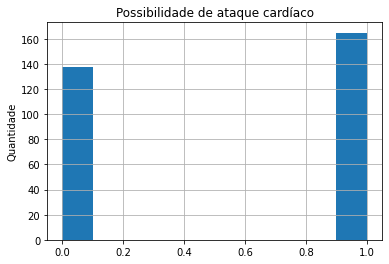

In [109]:

#Verificando ocorrência de possível ataque cardíaco
plt.hist(dados['target'])
plt.ylabel('Quantidade')
plt.title('Possibilidade de ataque cardíaco')
plt.grid(True)
plt.show()

CONCLUSÃO 1: NA BASE DE DADOS, POSSUI UMA QUANTIDADE MAIOR DE PACIENTES COM PROBLEMAS CARDÍACOS OU QUE TEM CHANCE DE TER UM ATAQUE CARDÍACO. ENTRETANTO, A QUANTIDADE DE PACIENTES DE CADA UMA NÃO SE DISTANCIA TANTO.

In [110]:
#Verificando quantas pacientes tem possibilidade de ataque cardíaco
print('Mais chances de atarque cardíaco:',dados[dados['target']==1].shape[0])
print('Menos chances de atarque cardíaco:',dados[dados['target']==0].shape[0])

Mais chances de atarque cardíaco: 165
Menos chances de atarque cardíaco: 138


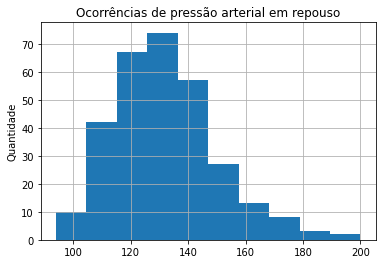

In [111]:
#Verificando pressão arterial em repouso
plt.hist(dados['trestbps'])
plt.ylabel('Quantidade')
plt.title('Ocorrências de pressão arterial em repouso')
plt.grid(True)
plt.show()

CONCLUSÃO 2: MAIOR QUANTIDADE DE PACIENTES ESTÁ ACIMA DA TAXA CONSIDERADA NORMAL PARA PRESSÃO ARTERIAL.

OBS: NÃO É POSSÍVEL CONCLUIR SE É PRESSÃO APRESENTADA NOS DADOS É SISTÓLICA OU DIASTÓLICA.

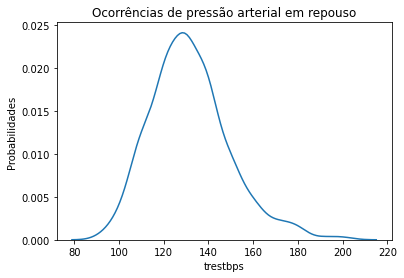

In [112]:
sns.distplot(dados.trestbps, hist=False, rug=False)
plt.ylabel('Probabilidades')
plt.title('Ocorrências de pressão arterial em repouso')
plt.show()

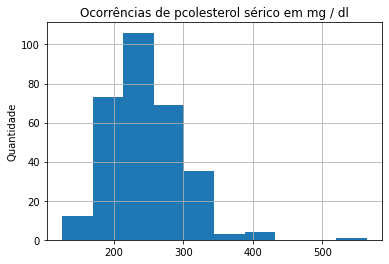

In [113]:
#Verificando colesterol sérico em mg / dl
plt.hist(dados['chol'])
plt.ylabel('Quantidade')
plt.title('Ocorrências de pcolesterol sérico em mg / dl')
plt.grid(True)
plt.show()

CONCLUSÃO 3: MAIOR PARTE DOS PSCIENTES ESTÁ ACIMA DA TAXA CONSIDERADA NORMAL PARA COLESTEROL SÉRICO: Colesterol total	menor que 170 mg/dl.

OBS: NÃO É POSSÍVEL CONCLUIR A QUAL TIPO DE COLESTEROL ESSES DADOS SE REFEREM. ESÁ SENDO CONSIDERADO O COLESTEROL TOTAL.

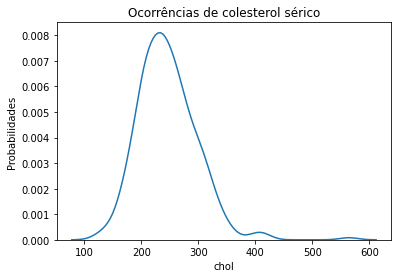

In [114]:
sns.distplot(dados.chol, hist=False, rug=False)
plt.ylabel('Probabilidades')
plt.title('Ocorrências de colesterol sérico')
plt.show()

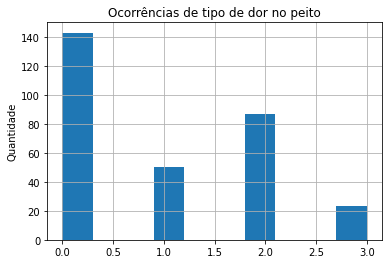

In [115]:
#Verificando tipo de dor no peito
plt.hist(dados['cp'])
plt.ylabel('Quantidade')
plt.title('Ocorrências de tipo de dor no peito')
plt.grid(True)
plt.show()

CONCLUSÃO 4: MAIOR PARTE DOS PACIENTES NÃO APRESENTARAM DORES NO PEITO.

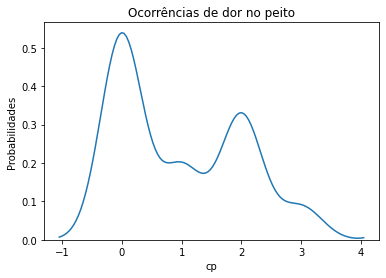

In [116]:
sns.distplot(dados.cp, hist=False, rug=False)
plt.ylabel('Probabilidades')
plt.title('Ocorrências de dor no peito')
plt.show()

In [117]:
import seaborn as sns

In [118]:
#Criando dataframe apenas para pacientes com chance de ataque cardíaco ou que possuem problemas cardíacos, representado por AC
AC = dados[dados['target']==1].drop(columns=['target']).reset_index(drop=True)

In [119]:
#Criando dataframe apenas para pacientes com menos chance de ataque cardíaco, representado por NAC
NAC = dados[dados['target']==0].drop(columns=['target']).reset_index(drop=True)

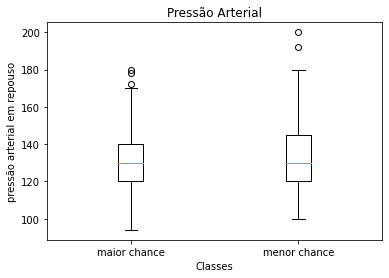

In [120]:
# Box plot comparando a pressão arterial em repouso para as duas classes
plt.boxplot([AC.trestbps,NAC.trestbps],labels=['maior chance','menor chance'])
plt.xlabel('Classes')
plt.ylabel('pressão arterial em repouso')
plt.title('Pressão Arterial')
plt.show()

CONCLUSÃO 5: NÃO HOUVE TANTA DISCREPÂNCIA ENTRE OS PACIENTES COM MAIOR E MENOR CHANCE EM RELAÇÃO A PRESSÃO ARTERIAL EM REPOUSO. PRESENÇA DE ALGUNS DADOS ANORMAIS.

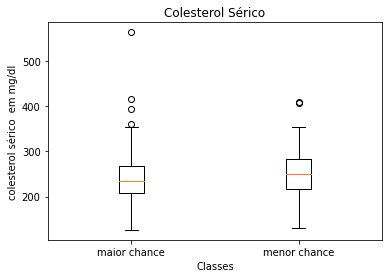

In [121]:
# Box plot comparando o colesterol sérico para as duas classes
plt.boxplot([AC.chol,NAC.chol],labels=['maior chance','menor chance'])
plt.xlabel('Classes')
plt.ylabel('colesterol sérico  em mg/dl')
plt.title('Colesterol Sérico')
plt.show()

CONCLUSÃO 6: NÃO HOUVE TANTA DISCREPÂNCIA ENTRE OS PACIENTES COM MAIOR E MENOR CHANCE EM RELAÇÃO AO COLESTEROL SÉRICO. PRESENÇA DE ALGUNS DADOS ANORMAIS.

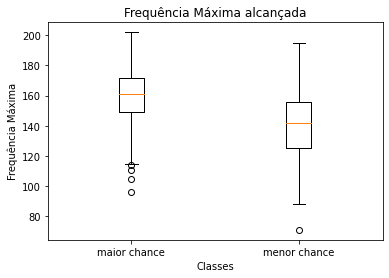

In [122]:
# Box plot comparando a frequência cardíaca máxima alcançada para as duas classes
plt.boxplot([AC.thalach,NAC.thalach],labels=['maior chance','menor chance'])
plt.xlabel('Classes')
plt.ylabel('Frequência Máxima')
plt.title('Frequência Máxima alcançada')
plt.show()

CONCLUSÃO 7: NESTA ANÁLISE HOUVE UMA MAIOR DISCREPÂNCIA ENTRE OS PACIENTES COM MAIOR E MENOR CHANCE EM RELAÇÃO A FREQUÊNCIA MÁXIMA ALCANÇADA. A TAXA DE PACIENTES COM MAIOR CHANCE É UM POUCO MENOR QUE O OUTRO GRUPO.

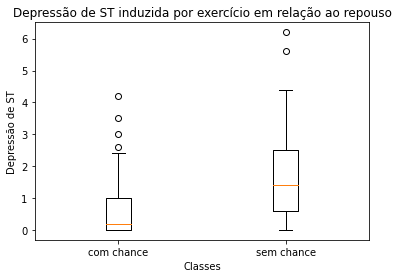

In [123]:
# Box plot comparando a depressão de ST para as duas classes
plt.boxplot([AC.oldpeak,NAC.oldpeak],labels=['com chance','sem chance'])
plt.xlabel('Classes')
plt.ylabel('Depressão de ST')
plt.title('Depressão de ST induzida por exercício em relação ao repouso')
plt.show()

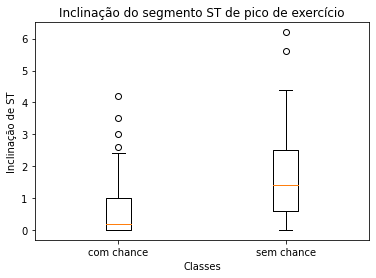

In [124]:
# Box plot comparando o inclinação de ST para as duas classes
plt.boxplot([AC.oldpeak,NAC.oldpeak],labels=['com chance','sem chance'])
plt.xlabel('Classes')
plt.ylabel('Inclinação de ST')
plt.title('Inclinação do segmento ST de pico de exercício')
plt.show()

## 4. Análise estatística dos dados

In [125]:
# Estatística b´ssica dos dados - média - Mais chances de ataque cardíaco ou problema cardíaco
AC.mean()

age          52.496970
sex           0.563636
cp            1.375758
trestbps    129.303030
chol        242.230303
fbs           0.139394
restecg       0.593939
thalach     158.466667
exang         0.139394
oldpeak       0.583030
slope         1.593939
ca            0.363636
thal          2.121212
dtype: float64

In [126]:
# Estatística básica dos dados - media - Menos chances de ataque cardíaco
NAC.mean()

age          56.601449
sex           0.826087
cp            0.478261
trestbps    134.398551
chol        251.086957
fbs           0.159420
restecg       0.449275
thalach     139.101449
exang         0.550725
oldpeak       1.585507
slope         1.166667
ca            1.166667
thal          2.543478
dtype: float64

In [127]:
# Estatística básica dos dados - desvio padrão - Mais chances de ataque cardíaco ou problema cardíaco
AC.std()

age          9.550651
sex          0.497444
cp           0.952222
trestbps    16.169613
chol        53.552872
fbs          0.347412
restecg      0.504818
thalach     19.174276
exang        0.347412
oldpeak      0.780683
slope        0.593635
ca           0.848894
thal         0.465752
dtype: float64

In [128]:
# Estatística básica dos dados - desvio padrão - Menos chances de ataque cardíaco
NAC.std()

age          7.962082
sex          0.380416
cp           0.905920
trestbps    18.729944
chol        49.454614
fbs          0.367401
restecg      0.541321
thalach     22.598782
exang        0.499232
oldpeak      1.300340
slope        0.561324
ca           1.043460
thal         0.684762
dtype: float64

## 5. Estudo de correlação entre atributos

In [129]:
# Correlaçao entre os atributos
corr = dados.corr()
corr

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


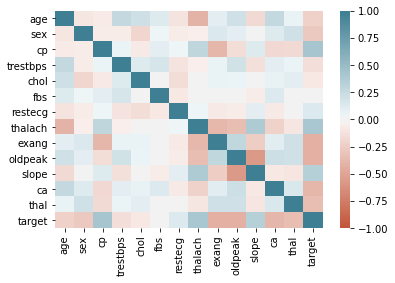

In [130]:
#plotando coeficientes de correlação em um mapa de calor
sns.heatmap(corr,vmin=-1, vmax=1, center=0,cmap=sns.diverging_palette(20, 220, n=200))

COCLUSÃO GERAL :NO MAPA DE CALOR É POSSÍVEL NOTAR QUE DIANTE OS DADOS COLETADOS, SÃO BAIXAS AS CORRELAÇÕES ENTRE A MAIORIA DOS ATRIBUTOS. OU SEJA, DISTINGUIR PACIENTES QUE POSSUEM PROBLEMAS CARDÍACOS OU PODEM TER UM ATAQUE CARDÍACO COM OS QUE TEM MENOS CHANCES, NÃO É TÃO EFETIVO DE DIAGNOSTICAR. COMO ANALISADO DE MODO GERAL, UM BOA PARTE DOS DADOS APRESENTAM BAIXA CORRELAÇÃO.

OS ATRIBUTOS QUE SE MOSTRARAM TER UMA MAIOR DIFERENÇA DE RELAÇÃO QUANDO SE TRATA DOS GRUPOS COM OU SEM CHANCE, FORAM: DEPRESSÃO DE ST INDUZIDA POR EXERCÍCIO, INCLINAÇÃO DE ST DE PICO DE EXERCÍCIO E FREQUÊNCIA CARDÍACA MÁXIMA ALCANÇADA. 